In [52]:
from dapnn.imports import *
from dapnn.data_processing import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import torch

import warnings
warnings.filterwarnings(action='once')

In [53]:
# Set the random seed for reproducible results
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

seed_everything()

# Train Set

In [63]:
log_path='data/csv/PDC2020_training/'
log = import_log(log_path)

num_traces = len(log['trace_id'].unique())
ratio = 0.2
traces_for_process_model = int(num_traces * ratio)
rand_traces = random.sample(list(log['trace_id'].unique()), traces_for_process_model)# traces_for_process_model)

log = log[log['trace_id'].isin(rand_traces)]
print(len(log['trace_id'].unique()))
log.head(5)

['data/csv/PDC2020_training/pdc_2020_0000000.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0000001.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0000010.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0000011.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0000100.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0000101.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0000110.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0000111.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0001000.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0001001.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0001010.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0001011.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0001100.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0001101.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0001110.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0001111.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0010000.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0010001.csv.gz', 'data/csv/PDC2020_training/pdc_2020_0010010.c

,activity,trace_id,event_id
trace_id,,,
trace 3,###start###,trace 3,0
trace 3,t11,trace 3,1
trace 3,t21,trace 3,2
trace 3,t32,trace 3,3
trace 3,t26,trace 3,4


# Process Discovery Using The IM

In [64]:
import pandas as pd
import pm4py

In [65]:
log = pm4py.format_dataframe(log, case_id='trace_id', activity_key='activity', timestamp_key='event_id')
log = pm4py.convert_to_event_log(log)

/lv_local/home/romh/PROGS/anaconda3/envs/dapnn/lib/python3.9/site-packages/pm4py/objects/log/util/dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/lv_local/home/romh/PROGS/anaconda3/envs/dapnn/lib/python3.9/site-packages/pm4py/objects/log/util/dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/lv_local/home/romh/PROGS/anaconda3/envs/dapnn/lib/python3.9/site-packages/pm4py/objects/log/util/dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify 

In [66]:
model_str = 'IM'

In [67]:
def get_process_model(log, model_str):
    if model_str == 'IM':
        net, im, fm = pm4py.discover_petri_net_inductive(log)
    elif model_str == 'alpha':
        net, im, fm = pm4py.discover_petri_net_alpha(log)
    elif model_str == 'heuristic':
        net, im, fm = pm4py.discover_petri_net_heuristics(log)
    return net, im, fm

In [68]:
net, im, fm = get_process_model(log, model_str)

In [69]:
import matplotlib.pyplot as plt
import networkx as nx

In [70]:
print(net) # TODO: MAYBE FROM TRANSITIONS AND ARCS TAKE ONLY THE SECOND ONE

places: [ p_101, p_102, p_103, p_104, p_106, p_107, p_108, p_109, p_110, p_111, p_112, p_113, p_115, p_116, p_117, p_118, p_12, p_120, p_121, p_122, p_123, p_127, p_128, p_129, p_13, p_130, p_132, p_133, p_134, p_135, p_137, p_138, p_139, p_14, p_140, p_142, p_143, p_144, p_145, p_147, p_148, p_149, p_15, p_150, p_151, p_152, p_154, p_155, p_156, p_157, p_159, p_16, p_160, p_161, p_162, p_163, p_164, p_166, p_167, p_168, p_169, p_17, p_171, p_172, p_173, p_174, p_175, p_176, p_178, p_179, p_180, p_181, p_183, p_184, p_185, p_186, p_187, p_188, p_19, p_190, p_191, p_192, p_193, p_195, p_196, p_197, p_198, p_199, p_20, p_200, p_202, p_203, p_204, p_205, p_206, p_207, p_209, p_21, p_210, p_211, p_212, p_213, p_214, p_218, p_219, p_22, p_220, p_221, p_223, p_224, p_225, p_226, p_228, p_229, p_230, p_231, p_26, p_27, p_28, p_29, p_33, p_34, p_35, p_36, p_38, p_39, p_40, p_41, p_42, p_43, p_47, p_48, p_49, p_5, p_50, p_54, p_55, p_56, p_57, p_6, p_61, p_62, p_63, p_64, p_68, p_69, p_7, p_70,

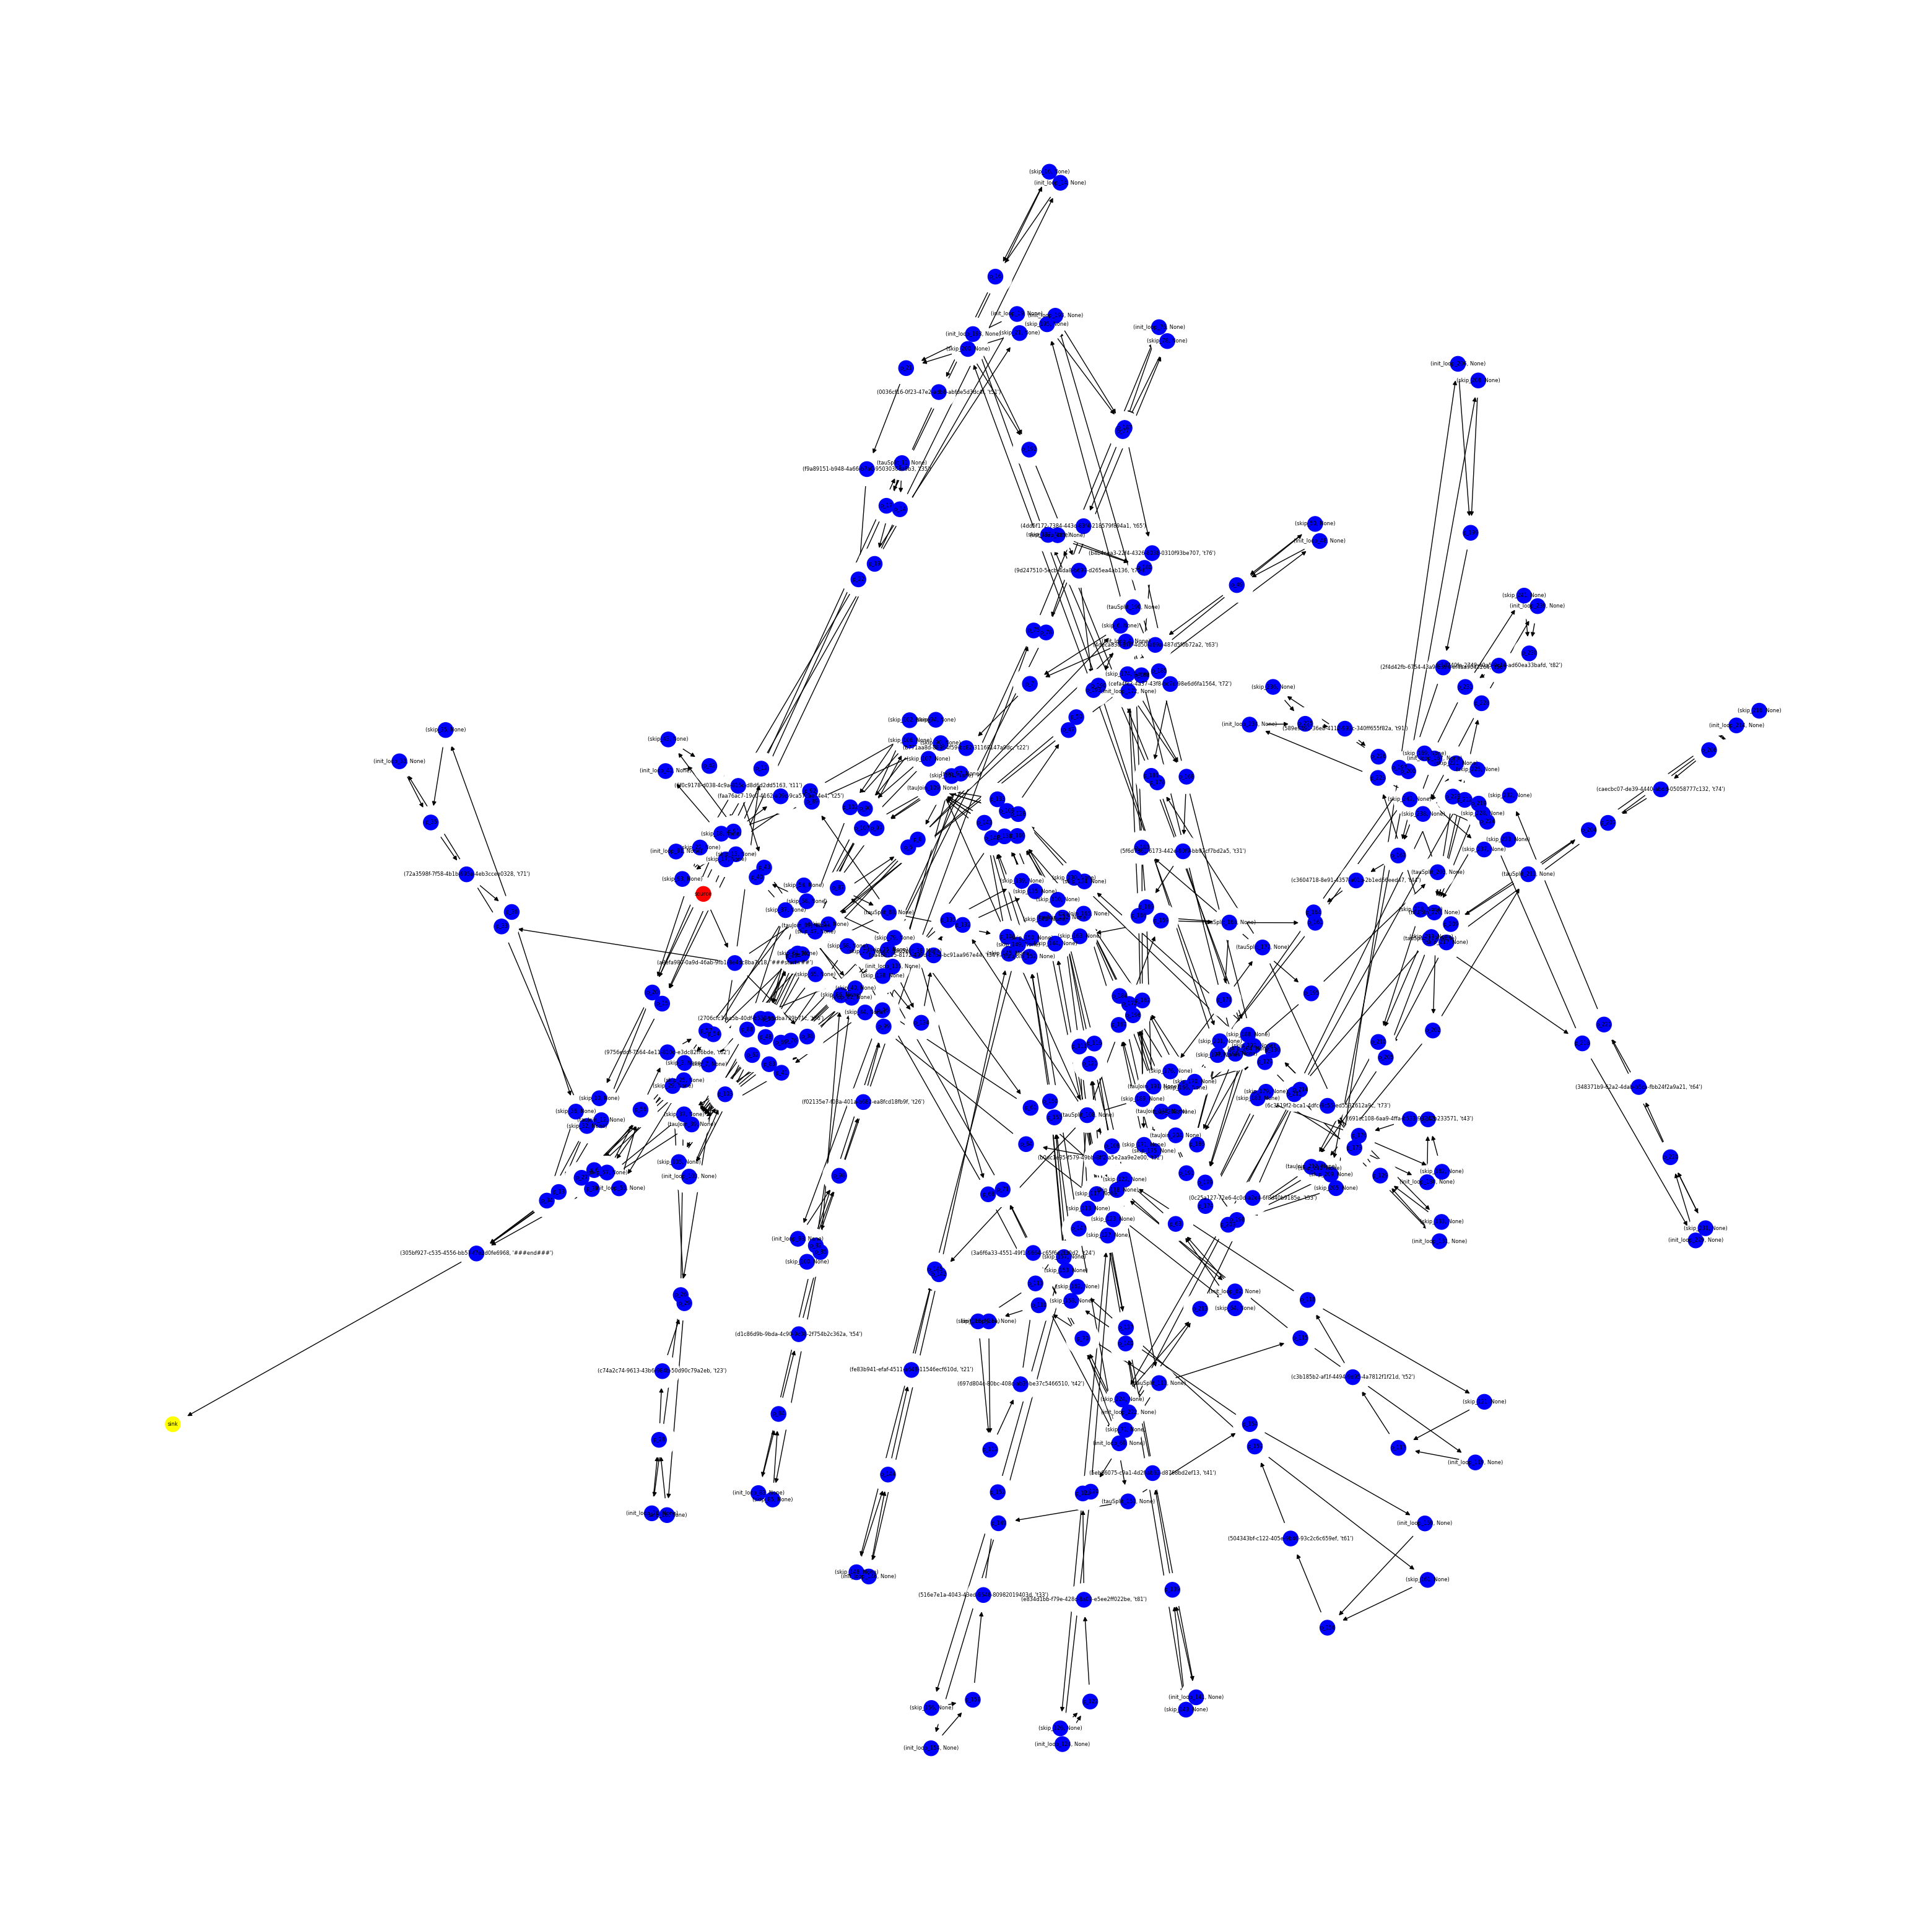

In [72]:
def draw_petri_net(net, im, fm):
    graph = nx.DiGraph()
    # Add transitions and places to the graph
    for transition in net.transitions:
        graph.add_node(transition, shape='circle', color='blue')
    for place in net.places:
        graph.add_node(place, shape='circle', color='red')

    # Add arcs to the graph
    for arc in net.arcs:
        graph.add_edge(arc.source, arc.target, weight=arc.weight)

    # Specify initial and final markings
    node_colors = {node: 'red' if node in im else ('yellow' if node in fm else 'blue') for node in graph.nodes}

    fig, ax = plt.subplots(figsize=(40, 40))  # Adjust the width and height as needed


    # Draw the graph
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='white', node_size=1500, font_size=6)
    nx.draw_networkx_nodes(graph, pos, node_color=list(node_colors.values()))
    plt.show()

draw_petri_net(net, im, fm)

# Test Set

In [73]:
test_path = 'data/csv/PDC2020_ground_truth/'
test_log = import_log(test_path)
test_log.head(5)

test_log = test_log[test_log['trace_id'].str.split(' ').str[1].astype(int) < 10000]

['data/csv/PDC2020_ground_truth/pdc_2020_0000000.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0000001.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0000010.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0000011.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0000100.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0000101.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0000110.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0000111.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0001000.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0001001.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0001010.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0001011.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0001100.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0001101.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0001110.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0001111.csv.gz', 'data/csv/PDC2020_ground_truth/pdc_2020_0010000.csv.gz', 'data/csv/PDC2020_ground_truth

In [74]:
df = test_log.copy()
df = df[['trace_id', 'normal']]
df = df.drop_duplicates()

In [75]:
test_log = pm4py.format_dataframe(test_log, case_id='trace_id', activity_key='activity', timestamp_key='event_id')
test_log = pm4py.convert_to_event_log(test_log)

/lv_local/home/romh/PROGS/anaconda3/envs/dapnn/lib/python3.9/site-packages/pm4py/objects/log/util/dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/lv_local/home/romh/PROGS/anaconda3/envs/dapnn/lib/python3.9/site-packages/pm4py/objects/log/util/dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/lv_local/home/romh/PROGS/anaconda3/envs/dapnn/lib/python3.9/site-packages/pm4py/objects/log/util/dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify 

In [76]:
def replay_log(log, net, im, fm ,df, model_str):
    replayed_log = pm4py.conformance_diagnostics_token_based_replay(log, net, im, fm)
    predicted = dict()
    for i, trace in enumerate(replayed_log):
        predicted[f'trace {i+1}'] = not trace['trace_is_fit'] # the trace is anomalous if it is not fit
    predicted = pd.DataFrame.from_dict(predicted, orient='index', columns=['predicted'])
    predicted.index.name = 'trace_id'
    predicted = predicted.join(df, on='trace_id')[['predicted', 'normal']]
    predicted['normal'].replace({True: False, False: True}, inplace=True)
    predicted.columns = ['y_pred', 'y_true']
    # predicted.to_csv('save_model/' + model_str + '_y_pred_y_true.csv', index=False)
    return predicted

In [77]:
predicted = replay_log(test_log, net, im, fm, df, model_str)

/lv_local/home/romh/PROGS/anaconda3/envs/dapnn/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


replaying log with TBR, completed variants ::   0%|          | 0/4948 [00:00<?, ?it/s]

In [78]:
len(predicted[predicted['y_pred'] == False])

9999